In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [102]:
bank=pd.read_csv("C:\\Users\\Govind S\\Downloads\\ds\\ds files\\assignments\\logistic regression\\bank-full (1).csv",sep=';')

In [3]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
bank[bank.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [6]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
bank.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [8]:
bank.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

<AxesSubplot:>

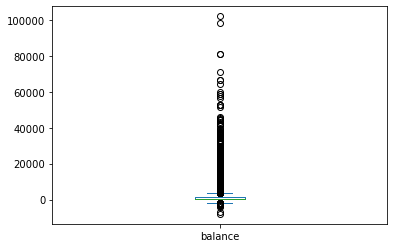

In [9]:
bank.balance.plot(kind='box')

In [10]:
bank[bank.balance>90000]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
26227,59,management,married,tertiary,no,98417,no,no,telephone,20,nov,145,5,-1,0,unknown,no
39989,51,management,single,tertiary,no,102127,no,no,cellular,3,jun,90,1,-1,0,unknown,no


In [11]:
bank.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [12]:
bank.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [13]:
bank.default[bank['default']=='no']=0
bank.default[bank['default']=='yes']=1

C:\Users\Govind S\AppData\Local\Temp\ipykernel_20784\3359330276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank.default[bank['default']=='no']=0
C:\Users\Govind S\AppData\Local\Temp\ipykernel_20784\3359330276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank.default[bank['default']=='yes']=1


In [14]:
bank.default.value_counts()

0    44396
1      815
Name: default, dtype: int64

In [15]:
bank.housing.value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [16]:
bank.housing[bank['housing']=='no']=0
bank.housing[bank['housing']=='yes']=1

C:\Users\Govind S\AppData\Local\Temp\ipykernel_20784\1865510265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank.housing[bank['housing']=='no']=0
C:\Users\Govind S\AppData\Local\Temp\ipykernel_20784\1865510265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank.housing[bank['housing']=='yes']=1


In [17]:
bank.housing.value_counts()

1    25130
0    20081
Name: housing, dtype: int64

In [18]:
bank.loan.value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [19]:
bank.loan[bank['loan']=='no']=0
bank.loan[bank['loan']=='yes']=1

C:\Users\Govind S\AppData\Local\Temp\ipykernel_20784\4224516599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank.loan[bank['loan']=='no']=0
C:\Users\Govind S\AppData\Local\Temp\ipykernel_20784\4224516599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank.loan[bank['loan']=='yes']=1


In [20]:
bank.loan.value_counts()

0    37967
1     7244
Name: loan, dtype: int64

In [21]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,no


In [22]:
bank.y[bank['y']=='no']=0
bank.y[bank['y']=='yes']=1

C:\Users\Govind S\AppData\Local\Temp\ipykernel_20784\3850251632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank.y[bank['y']=='no']=0
C:\Users\Govind S\AppData\Local\Temp\ipykernel_20784\3850251632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank.y[bank['y']=='yes']=1


In [23]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [24]:
bank.month.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [25]:
X=bank.iloc[:,0:-1]
Y=bank.iloc[:,-1]

In [26]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown


In [27]:
Z=pd.get_dummies(columns=['education','job','marital','contact','poutcome'],data=X)

In [28]:
Z.month.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [29]:
Z.month[Z.month=='jan']=1
Z.month[Z.month=='feb']=2
Z.month[Z.month=='mar']=3
Z.month[Z.month=='apr']=4
Z.month[Z.month=='may']=5
Z.month[Z.month=='jun']=6
Z.month[Z.month=='jul']=7
Z.month[Z.month=='aug']=8
Z.month[Z.month=='sep']=9
Z.month[Z.month=='oct']=10
Z.month[Z.month=='nov']=11
Z.month[Z.month=='dec']=12

C:\Users\Govind S\AppData\Local\Temp\ipykernel_20784\1462978444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z.month[Z.month=='jan']=1
C:\Users\Govind S\AppData\Local\Temp\ipykernel_20784\1462978444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z.month[Z.month=='feb']=2
C:\Users\Govind S\AppData\Local\Temp\ipykernel_20784\1462978444.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z.month[Z.month=='mar']=3
C:\Users\Govi

In [30]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: object

In [31]:
Z=Z.astype({'default':int,'housing':int,'loan':int,'month':int})

In [32]:
Y=Y.astype(int)

In [33]:
Y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [34]:
bank.y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [35]:
classifier=LogisticRegression()
classifier.fit(Z,Y)

C:\Users\Govind S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
classifier.score(Z,Y)

0.8930127623808365

In [37]:
Z1=Z.drop(['day','month'],axis=1)
Z2=Z.drop(['pdays'],axis=1)

In [38]:
classifier1=LogisticRegression()
classifier1.fit(Z1,Y)

C:\Users\Govind S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
classifier1.score(Z1,Y)

0.8920395478976355

In [40]:
classifier2=LogisticRegression()
classifier2.fit(Z2,Y)

C:\Users\Govind S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
classifier2.score(Z2,Y)

0.8898940523323969

In [42]:
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [43]:
Z_train, Z_test, Y_train, Y_test = train_test_split(Z,Y, test_size=0.2, random_state=0)
Z1_train, Z1_test, Y_train, Y_test = train_test_split(Z1,Y, test_size=0.2, random_state=0)
Z2_train, Z2_test, Y_train, Y_test = train_test_split(Z2,Y, test_size=0.2, random_state=0)

In [44]:
classifier3=LogisticRegression()
classifier3.fit(Z_train,Y_train)

C:\Users\Govind S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
classifier3.score(Z_train,Y_train)

0.8899303251493033

In [46]:
Y_pred=classifier3.predict(Z_test)

In [47]:
print(accuracy_score(Y_test,Y_pred))

0.886873825058056


In [48]:
classifier4=LogisticRegression()
classifier4.fit(Z1_train,Y_train)
classifier5=LogisticRegression()
classifier5.fit(Z2_train,Y_train)

C:\Users\Govind S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Govind S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

LogisticRegression()

In [49]:
classifier4.score(Z1_train,Y_train)
Y1_pred=classifier4.predict(Z1_test)
print(accuracy_score(Y_test,Y1_pred))

0.8926241291606768


In [50]:
classifier5.score(Z2_train,Y_train)
Y2_pred=classifier5.predict(Z2_test)
print(accuracy_score(Y_test,Y2_pred))

0.8874267389140772


In [51]:
bank.pdays.value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

In [52]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [53]:
Z_train_normal=scale(Z_train)

In [54]:
Z_train_normal

array([[ 1.51506117, -0.13601952, -0.23163698, ..., -0.20517128,
        -0.18404781,  0.47153594],
       [-0.36959746, -0.13601952,  0.10603762, ..., -0.20517128,
        -0.18404781,  0.47153594],
       [-0.55806332, -0.13601952,  0.47063537, ..., -0.20517128,
        -0.18404781, -2.12072912],
       ...,
       [-0.55806332, -0.13601952, -0.34030268, ..., -0.20517128,
        -0.18404781,  0.47153594],
       [ 2.74008927, -0.13601952, -0.24526074, ..., -0.20517128,
        -0.18404781, -2.12072912],
       [ 0.47849892, -0.13601952, -0.42658649, ..., -0.20517128,
        -0.18404781,  0.47153594]])

In [55]:
pca=PCA()

In [56]:
pca_values=pca.fit_transform(Z_train_normal)

In [57]:
pca_values

array([[-2.39681737e-01,  1.64963604e-01, -3.84349388e-01, ...,
         8.94567441e-16, -7.54534123e-15, -6.57473409e-15],
       [-1.85317812e+00,  2.90510179e-01,  1.19394393e+00, ...,
         9.56862047e-16,  1.06800183e-14, -2.42770790e-15],
       [ 3.00817925e+00,  1.16935676e+00, -1.21002035e+00, ...,
         2.42914142e-15,  7.40685457e-16,  3.43233058e-15],
       ...,
       [ 8.81009078e-02, -2.23748777e+00,  9.34379903e-01, ...,
         1.24956936e-16, -6.22467161e-17, -2.56430450e-18],
       [ 2.72091308e+00,  2.13922193e+00,  2.76048975e+00, ...,
        -1.82525363e-16,  1.62063617e-16, -2.61889323e-16],
       [-1.61188890e+00,  1.20751069e+00, -1.94356331e+00, ...,
         1.84838088e-16,  7.34815412e-17, -1.45619884e-16]])

In [58]:
var=pca.explained_variance_ratio_

In [59]:
var

array([9.24533396e-02, 7.00847063e-02, 6.60006169e-02, 5.02219390e-02,
       4.29444260e-02, 3.99436594e-02, 3.66042494e-02, 3.38825391e-02,
       3.16101239e-02, 3.14516825e-02, 3.02030841e-02, 2.95666383e-02,
       2.94398212e-02, 2.87147168e-02, 2.83469241e-02, 2.81288235e-02,
       2.77777917e-02, 2.77133479e-02, 2.64516147e-02, 2.55107338e-02,
       2.50494794e-02, 2.47866975e-02, 2.37028816e-02, 2.25302325e-02,
       2.22327875e-02, 2.11048753e-02, 2.03213554e-02, 1.87083711e-02,
       1.71376742e-02, 1.22969719e-02, 1.09727804e-02, 4.10511505e-03,
       1.82332063e-32, 6.13067513e-33, 3.72858345e-33, 3.61171817e-33,
       1.06290036e-33])

In [60]:
import numpy as np
varsa=np.cumsum(var)

In [61]:
varsa

array([0.09245334, 0.16253805, 0.22853866, 0.2787606 , 0.32170503,
       0.36164869, 0.39825294, 0.43213548, 0.4637456 , 0.49519728,
       0.52540037, 0.554967  , 0.58440683, 0.61312154, 0.64146847,
       0.66959729, 0.69737508, 0.72508843, 0.75154004, 0.77705078,
       0.80210026, 0.82688695, 0.85058984, 0.87312007, 0.89535286,
       0.91645773, 0.93677909, 0.95548746, 0.97262513, 0.9849221 ,
       0.99589488, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [62]:
bank.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [63]:
bank[bank.job=='blue-collar'].y.value_counts()

0    9024
1     708
Name: y, dtype: int64

In [85]:
classifier1.

In [85]:
bank[['job','y']].groupby(['y']).count()

,job
y,
0,39922
1,5289


In [80]:
bank.groupby('job')

In [95]:
df=pd.crosstab(bank['y'],bank['job'])

In [94]:
import scipy.stats as stats

In [96]:
df

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
0,4540,9024,1364,1131,8157,1748,1392,3785,669,6757,1101,254
1,631,708,123,109,1301,516,187,369,269,840,202,34


In [100]:
df2=df.iloc[:,[2,3,7]]

In [101]:
stats.chi2_contingency(df2)

(0.5193380916719074,
 0.7713068107681353,
 2,
 array([[1357.12251126, 1131.69597442, 3791.18151431],
        [ 129.87748874,  108.30402558,  362.81848569]]))

In [108]:
for i in bank.index:
    bank.balance[i]=bank.balance[i]+1

C:\Users\Govind S\AppData\Local\Temp\ipykernel_20784\2702398731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank.balance[i]=bank.balance[i]+1


KeyboardInterrupt: 

In [109]:
bank.job=bank.job.apply(lambda x:x[4:])

In [110]:
bank.job

0          gement
1          nician
2        epreneur
3         -collar
4             own
           ...   
45206      nician
45207         red
45208         red
45209     -collar
45210    epreneur
Name: job, Length: 45211, dtype: object

In [112]:
a='    3242343      '
int(a)

3242343

In [113]:
bank.job.value_counts()

-collar      9732
gement       9458
nician       7597
n.           5171
ices         4154
red          2264
-employed    1579
epreneur     1487
ployed       1303
emaid        1240
ent           938
own           288
Name: job, dtype: int64